<a href="https://colab.research.google.com/github/rushiai/temp/blob/main/stock_EDA_LSTM_1_7_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas_ta

     |████████████████████████████████| 92kB 5.8MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=3f4d86e3a9fd1e60cb7ada5139655ca27bfd5ee2a30ab8da340953391ad6bea6
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 11.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=911ea8e9bde98749813a93c38922f125e7c647e234daaf833ff503575be83a14
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
# import yfinance as yf
import datetime as dt
import pandas_ta as ta
import numpy as np



# This function finds the buy sell
# schedule for maximum profit
def stockBuySell(fdf):
    
    # start = dt.datetime.today()-dt.timedelta(7)
    # end = dt.datetime.today()
    # fdf = yf.download(tick,start=start, end=end,interval='1m')
    # fdf.ta.strategy(ta.AllStrategy)
    price = fdf['close']
    n = len(fdf)
    
    fdf['final_buy'] = 'no'
    # fdf['final_sell'] = 'no'
    # fdf['profit'] = 0
    total = 0
    # Prices must be given for at least two days
    if (n == 1):
        return
    
    # Traverse through given price array
    i = 0
    while (i < (n - 1)):
        
        # Find Local Minima
        # Note that the limit is (n-2) as we are
        # comparing present element to the next element
        while ((i < (n - 1)) and
                (price[i + 1] <= price[i])):
            i += 1
        
        # If we reached the end, break
        # as no further solution possible
        if (i == n - 1):
            break
        
        # Store the index of minima
        buy = i
        i += 1
        
        # Find Local Maxima
        # Note that the limit is (n-1) as we are
        # comparing to previous element
        while ((i < n) and (price[i] >= price[i - 1])):
            i += 1
            
        # Store the index of maxima
        sell = i - 1
        
        profit = fdf['close'][sell] - fdf['close'][buy]
        
        if (profit >= 7):
            
            print("Buy on day: ",buy,"\t", "Sell on day: ",sell,"\t", "Profit: ",profit)  
            total = total + profit
            # print(total)
            fdf['final_buy'][buy] = 'buy'
            fdf['final_buy'][sell] = 'sell'
            # fdf['profit'][sell] = profit
    # fdf.drop(['open', 'high', 'low', 'close', 'adj_close', 'volume','HILOs_13_21','HILOl_13_21','SUPERTl_7_3.0','QQEs_14_5_4.236','PSARs_0.02_0.2','PSARl_0.02_0.2','SUPERTs_7_3.0','QQEl_14_5_4.236'],axis=1,inplace=True)
    # fdf = fdf.dropna()
    # fdf = fdf.reset_index(drop=True)
    return fdf   

In [ ]:
link = 'https://raw.githubusercontent.com/rushiai/data_csv/main/AXISBANK__EQ__NSE__NSE__MINUTE.csv'
df = pd.read_csv(link)
df = df.set_index(['timestamp'])
df.index = pd.to_datetime(df.index)
# df.head()
vol = df.resample('15min').sum().volume
price = df['close'].resample('15Min').ohlc()
ndf = pd.concat([price, vol], axis=1)
ndf.dropna(inplace=True)

In [ ]:
# temp = ndf.iloc[17698:]
# train = temp.iloc[0:6000]
# test = temp.iloc[6001:]

temp = ndf
train = temp
# test = temp.iloc[6001:]

In [ ]:
train.ta.strategy(ta.AllStrategy)
# test.ta.strategy(ta.AllStrategy)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
trainp = stockBuySell(train)
# testp = stockBuySell(test)

Buy on day:  25 	 Sell on day:  30 	 Profit:  11.199999999999989
Buy on day:  151 	 Sell on day:  152 	 Profit:  7.199999999999989
Buy on day:  199 	 Sell on day:  201 	 Profit:  8.100000000000023
Buy on day:  229 	 Sell on day:  234 	 Profit:  11.0
Buy on day:  422 	 Sell on day:  428 	 Profit:  8.900000000000034
Buy on day:  447 	 Sell on day:  450 	 Profit:  12.600000000000023
Buy on day:  527 	 Sell on day:  532 	 Profit:  7.050000000000011
Buy on day:  599 	 Sell on day:  601 	 Profit:  7.7000000000000455
Buy on day:  821 	 Sell on day:  825 	 Profit:  9.799999999999955
Buy on day:  891 	 Sell on day:  902 	 Profit:  28.450000000000045
Buy on day:  934 	 Sell on day:  940 	 Profit:  7.4500000000000455
Buy on day:  999 	 Sell on day:  1003 	 Profit:  14.200000000000045
Buy on day:  1072 	 Sell on day:  1076 	 Profit:  9.0
Buy on day:  1145 	 Sell on day:  1149 	 Profit:  8.549999999999955
Buy on day:  1349 	 Sell on day:  1354 	 Profit:  10.649999999999977
Buy on day:  1448 	 Sell 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


4840 	 Sell on day:  4844 	 Profit:  7.5
Buy on day:  4990 	 Sell on day:  4991 	 Profit:  16.19999999999999
Buy on day:  4993 	 Sell on day:  4999 	 Profit:  11.199999999999989
Buy on day:  5013 	 Sell on day:  5016 	 Profit:  7.349999999999966
Buy on day:  5089 	 Sell on day:  5092 	 Profit:  23.0
Buy on day:  5097 	 Sell on day:  5101 	 Profit:  7.2999999999999545
Buy on day:  5102 	 Sell on day:  5106 	 Profit:  14.299999999999955
Buy on day:  5114 	 Sell on day:  5118 	 Profit:  17.90000000000009
Buy on day:  5163 	 Sell on day:  5166 	 Profit:  14.149999999999977
Buy on day:  5240 	 Sell on day:  5241 	 Profit:  20.350000000000023
Buy on day:  5247 	 Sell on day:  5252 	 Profit:  8.0
Buy on day:  5257 	 Sell on day:  5259 	 Profit:  7.2000000000000455
Buy on day:  5263 	 Sell on day:  5267 	 Profit:  7.600000000000023
Buy on day:  5291 	 Sell on day:  5295 	 Profit:  9.350000000000023
Buy on day:  5313 	 Sell on day:  5316 	 Profit:  18.75
Buy on day:  5341 	 Sell on day:  5345 	

In [ ]:
trainp.head()

,open,high,low,close,volume,AD,ADOSC_3_10,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AMATe_LR_2,AMATe_SR_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CDL_DOJI_10_0.1,AROOND_14,...,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,SWMA_10,T3_10_0.7,TEMA_10,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRIMA_10,TRIX_30_9,TRIXs_30_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QQEl_14_5_4.236,QQEs_14_5_4.236,QS_10,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,TRUERANGE_1,TSI_13_25,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,Z_30,VIDYA_14,VTXP_14,VTXM_14,final_buy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02 09:15:00+05:30,451.20,451.65,448.95,448.95,211638.0,-211638.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,211638.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.833333,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,2.70,NaN,449.850000,NaN,449.6250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2017-01-02 09:30:00+05:30,448.05,449.05,447.50,447.50,117877.0,-329515.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,93761.0,93761.0,211638.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.354839,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2.60,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,1.55,NaN,449.194164,NaN,447.8875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2017-01-02 09:45:00+05:30,445.80,447.00,445.80,446.80,200269.0,-196002.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,-106508.0,-106508.0,93761.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2.05,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,1.70,NaN,448.188316,NaN,446.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2017-01-02 10:00:00+05:30,446.55,447.50,446.35,446.50,62625.0,-242290.376812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,-169133.0,-169133.0,-106508.0,7439.5,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043478,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0.55,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,1.15,NaN,448.039792,NaN,446.7125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2017-01-02 10:15:00+05:30,446.70,447.15,446.40,446.40,34067.0,-276357.376812,NaN,447.566667,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,-203200.0,-203200.0,-169133.0,-76816.3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,445.123344,447.23,449.336656,0.942091,NaN,-0.400000,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0.35,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,0.75,NaN,447.964217,NaN,446.5875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
trainp.isnull().sum().sort_values(ascending=False).head(8).index

Index(['SUPERTs_7_3.0', 'QQEl_14_5_4.236', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2',
       'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'HILOl_13_21', 'HILOs_13_21'],
      dtype='object')

In [ ]:
trainp = trainp.drop(columns=['SUPERTs_7_3.0', 'QQEl_14_5_4.236', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2',
       'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'HILOl_13_21', 'HILOs_13_21','open', 'high', 'low'])

In [ ]:
trainp.isnull().sum().sort_values(ascending=False)

ISB_26                         77
KSTs_9                         52
ISA_9                          51
KST_10_15_20_30_10_10_10_15    44
EBSW_40_10                     39
                               ..
HW-UPPER                        0
HW-LOWER                        0
INC_1                           0
NVI_1                           0
close                           0
Length: 186, dtype: int64

In [ ]:
trainp = trainp.bfill(axis ='rows')

In [ ]:
trainp = trainp.dropna()

In [ ]:
trainp.isnull().sum().sort_values(ascending=False)

final_buy           0
EOM_14_100000000    0
HA_low              0
HA_high             0
HA_open             0
                   ..
PVOs_12_26_9        0
PVOh_12_26_9        0
PVO_12_26_9         0
PVI_1               0
close               0
Length: 186, dtype: int64

In [ ]:
trainp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24672 entries, 2017-01-02 09:15:00+05:30 to 2020-12-31 15:00:00+05:30
Columns: 186 entries, close to final_buy
dtypes: bool(1), float64(169), int64(15), object(1)
memory usage: 35.0+ MB


In [ ]:
# change data type
cols = trainp.select_dtypes(include=[np.float64]).columns
trainp[cols] = trainp[cols].astype(np.float32)

cols = trainp.select_dtypes(include=[np.int64]).columns
trainp[cols] = trainp[cols].astype(np.int32)

In [ ]:
trainp.columns

Index(['close', 'volume', 'AD', 'ADOSC_3_10', 'ABER_ZG_5_15', 'ABER_SG_5_15',
       'ABER_XG_5_15', 'ABER_ATR_5_15', 'ACCBL_20', 'ACCBM_20',
       ...
       'VWMA_10', 'WCP', 'WILLR_14', 'WMA_10', 'ZL_EMA_10', 'Z_30', 'VIDYA_14',
       'VTXP_14', 'VTXM_14', 'final_buy'],
      dtype='object', length=186)

In [ ]:
og_target = trainp['final_buy']

In [ ]:
mapping = {'buy':1,'no':0,'sell':-1}

In [ ]:
trainp['final_buy'] = trainp['final_buy'].map(mapping)

In [ ]:
trainp.final_buy.value_counts()

 0    23532
-1      570
 1      570
Name: final_buy, dtype: int64

# Feature selection

In [ ]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(trainp)

VarianceThreshold(threshold=0.1)

In [ ]:
trainp.columns[var_thres.get_support()]

Index(['close', 'volume', 'AD', 'ADOSC_3_10', 'ABER_ZG_5_15', 'ABER_SG_5_15',
       'ABER_XG_5_15', 'ABER_ATR_5_15', 'ACCBL_20', 'ACCBM_20',
       ...
       'TRUERANGE_1', 'TSI_13_25', 'VWAP_D', 'VWMA_10', 'WCP', 'WILLR_14',
       'WMA_10', 'ZL_EMA_10', 'Z_30', 'VIDYA_14'],
      dtype='object', length=161)

In [ ]:
target = trainp.final_buy

In [ ]:
trainp = trainp.drop(columns='final_buy')

In [ ]:
target = target.astype(np.int32)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

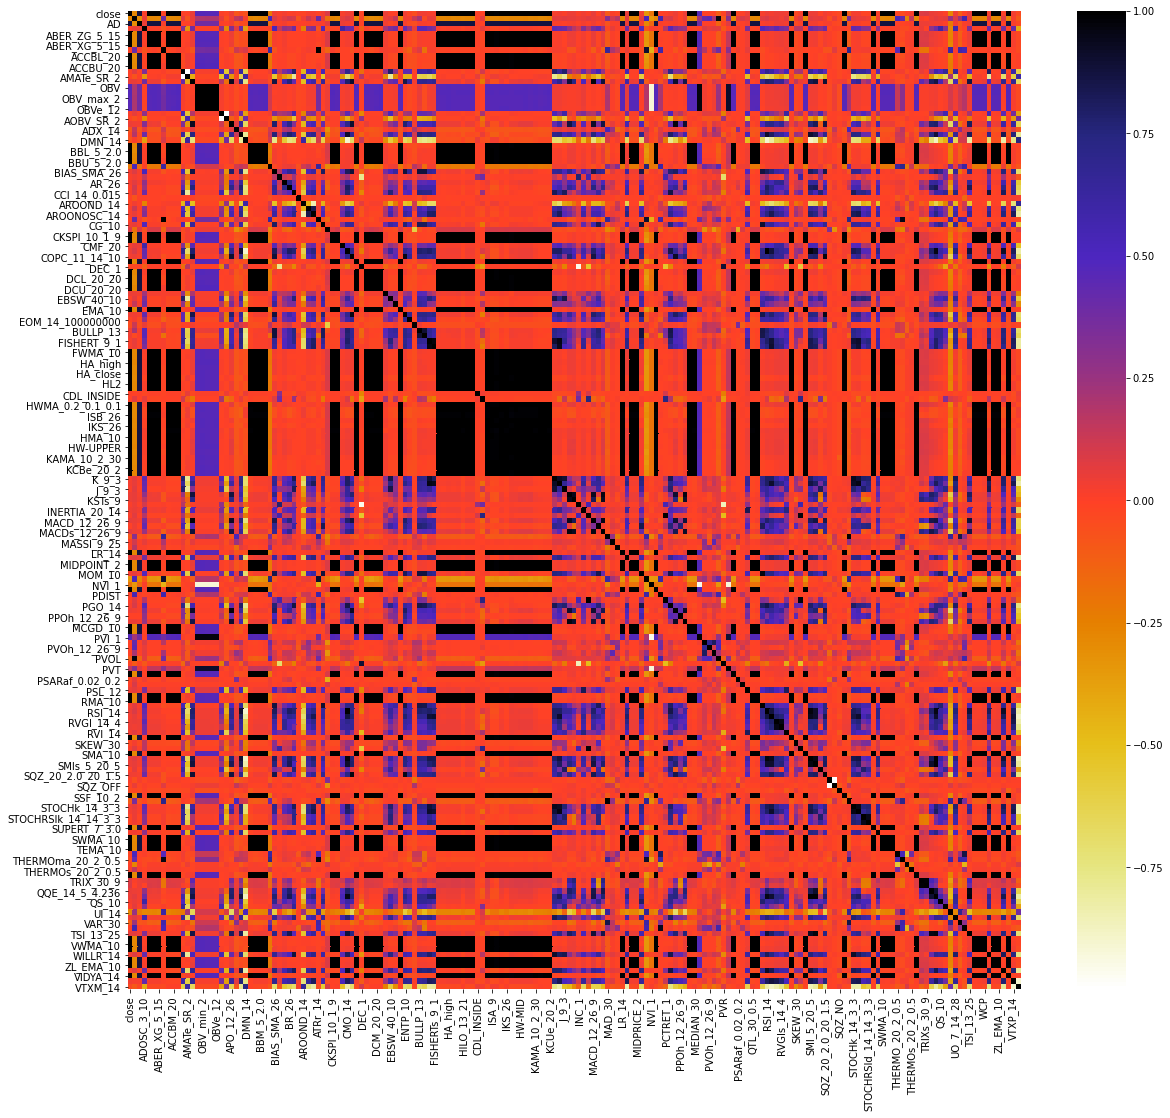

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(trainp.corr(),cmap=plt.cm.CMRmap_r)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(trainp, 0.99)
len(set(corr_features))

73

In [ ]:
corr_features

{'ABER_SG_5_15',
 'ABER_XG_5_15',
 'ABER_ZG_5_15',
 'ACCBL_20',
 'ACCBM_20',
 'ACCBU_20',
 'ALMA_10_6.0_0.85',
 'AMATe_SR_2',
 'AOBV_SR_2',
 'ATRr_14',
 'BBL_5_2.0',
 'BBM_5_2.0',
 'BBU_5_2.0',
 'CKSPl_10_1_9',
 'CKSPs_10_1_9',
 'DCL_20_20',
 'DCM_20_20',
 'DCU_20_20',
 'DEMA_10',
 'EMA_10',
 'FWMA_10',
 'HA_close',
 'HA_high',
 'HA_low',
 'HA_open',
 'HILO_13_21',
 'HL2',
 'HLC3',
 'HMA_10',
 'HW-LOWER',
 'HW-MID',
 'HW-UPPER',
 'HWMA_0.2_0.1_0.1',
 'ICS_26',
 'IKS_26',
 'ISA_9',
 'ISB_26',
 'ITS_9',
 'KAMA_10_2_30',
 'KCBe_20_2',
 'KCLe_20_2',
 'KCUe_20_2',
 'LDECAY_5',
 'LR_14',
 'MCGD_10',
 'MEDIAN_30',
 'MIDPOINT_2',
 'MIDPRICE_2',
 'OBV_max_2',
 'OBV_min_2',
 'OBVe_12',
 'OBVe_4',
 'OHLC4',
 'PCTRET_1',
 'PWMA_10',
 'QTL_30_0.5',
 'RMA_10',
 'RSI_14',
 'SINWMA_14',
 'SMA_10',
 'SQZ_OFF',
 'SSF_10_2',
 'SUPERT_7_3.0',
 'SWMA_10',
 'T3_10_0.7',
 'TEMA_10',
 'TRIMA_10',
 'VIDYA_14',
 'VWAP_D',
 'VWMA_10',
 'WCP',
 'WMA_10',
 'ZL_EMA_10'}

In [ ]:
trainp_corr_crop = trainp.drop(corr_features,axis=1)

## mutual info

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(trainp, target)
# mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = trainp.columns
mutual_info.sort_values(ascending=False)

DPO_20             0.061064
PCTRET_1           0.049625
LOGRET_1           0.049428
SLOPE_1            0.047591
BULLP_13           0.036794
                     ...   
FISHERTs_9_1       0.000832
VWAP_D             0.000680
PSARaf_0.02_0.2    0.000016
OBVe_12            0.000002
PSARr_0.02_0.2     0.000000
Length: 185, dtype: float64

DPO_20       0.061480
PCTRET_1     0.049458
LOGRET_1     0.049415
SLOPE_1      0.049389
BULLP_13     0.036794
               ...   
APO_12_26    0.000829
VWAP_D       0.000657
SQZ_ON       0.000456
OBVe_12      0.000002
SQZ_NO       0.000000
Length: 185, dtype: float64

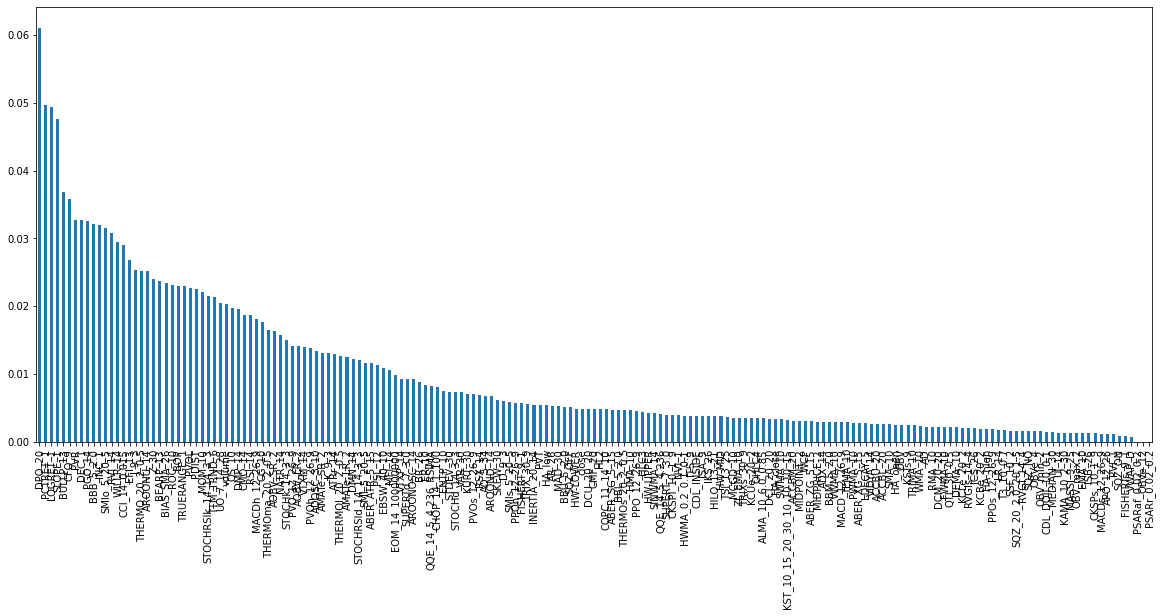

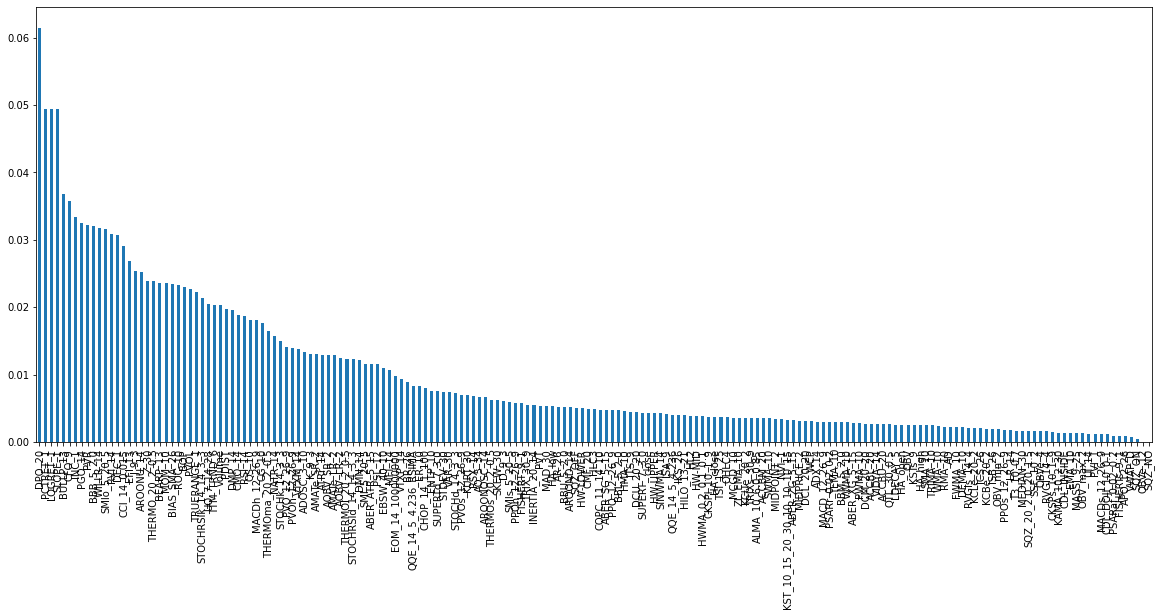

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# from sklearn.feature_selection import SelectKBest
# #No we Will select the  top 5 important features
# sel_five_cols = SelectKBest(mutual_info_classif, k=5)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]

In [ ]:
# #  checking columns
# train_cols = train.columns
# test_cols = test.columns

# common_cols = train_cols.intersection(test_cols)
# train_not_test = train_cols.difference(test_cols)

In [ ]:
trainp_corr_crop.head(2)

,close,volume,AD,ADOSC_3_10,ABER_ATR_5_15,AMATe_LR_2,AO_5_34,OBV,AOBV_LR_2,APO_12_26,ADX_14,DMP_14,DMN_14,BBB_5_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CDL_DOJI_10_0.1,AROOND_14,AROONU_14,AROONOSC_14,CG_10,CHOP_14_1_100,CMF_20,CMO_14,COPC_11_14_10,DEC_1,DPO_20,EBSW_40_10,EFI_13,ENTP_10,EOM_14_100000000,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,CDL_INSIDE,...,PSARr_0.02_0.2,PSL_12,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,RVI_14,SKEW_30,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_NO,STDEV_30,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,SUPERTd_7_3.0,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRIX_30_9,TRIXs_30_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QS_10,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,TRUERANGE_1,TSI_13_25,WILLR_14,Z_30,VTXP_14,VTXM_14
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02 09:15:00+05:30,448.950012,211638.0,-211638.0,96378.03125,1.272061,0,7.691176,211638.0,0,0.439744,14.739909,21.217875,34.466522,0.942091,-0.001294,-0.833333,77.560974,72.517319,-25.858356,0,57.142857,0.0,-57.142857,-5.511345,28.826862,-0.009679,-32.414116,0.908976,0,-2.2125,0.0,-55513.4375,3.322992,-357.879089,0.537415,-0.292308,-0.692308,0.0,0.0,0,...,False,25.0,-0.879831,0.0,-0.018987,-0.00166,0.0,1.821935,-1.45,-0.128405,-0.128405,0.0,-1.558333,0,1,2.300859,47.665321,60.328251,100.0,97.863304,1,2.6,1.021053,0,0,0.000605,0.006863,38.290493,33.792942,-0.33,-1,0.360363,54.648167,5.117489,2.70,-15.753425,-70.466324,3.656605,0.756098,1.287263
2017-01-02 09:30:00+05:30,447.500000,117877.0,-329515.0,96378.03125,1.272061,0,7.691176,93761.0,0,0.439744,14.739909,21.217875,34.466522,0.942091,-0.001294,-0.354839,77.560974,72.517319,-25.858356,0,57.142857,0.0,-57.142857,-5.511345,28.826862,-0.009679,-32.414116,0.908976,1,-2.2125,0.0,-55513.4375,3.322992,-357.879089,0.537415,-0.292308,-0.692308,0.0,0.0,0,...,False,25.0,-0.879831,0.0,-0.018987,-0.00166,0.0,1.821935,-1.45,-0.128405,-0.128405,0.0,-1.558333,0,1,2.300859,47.665321,60.328251,100.0,97.863304,1,2.6,1.021053,0,0,0.000605,0.006863,38.290493,33.792942,-0.33,-1,0.360363,54.648167,5.117489,1.55,-15.753425,-70.466324,3.656605,0.756098,1.287263


,close,volume,AD,ADOSC_3_10,ABER_ATR_5_15,AMATe_LR_2,AO_5_34,OBV,AOBV_LR_2,APO_12_26,ADX_14,DMP_14,DMN_14,BBB_5_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CDL_DOJI_10_0.1,AROOND_14,AROONU_14,AROONOSC_14,CG_10,CHOP_14_1_100,CMF_20,CMO_14,COPC_11_14_10,DEC_1,DPO_20,EBSW_40_10,EFI_13,ENTP_10,EOM_14_100000000,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,CDL_INSIDE,...,PSARr_0.02_0.2,PSL_12,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,RVI_14,SKEW_30,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_NO,STDEV_30,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,SUPERTd_7_3.0,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRIX_30_9,TRIXs_30_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QS_10,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,TRUERANGE_1,TSI_13_25,WILLR_14,Z_30,VTXP_14,VTXM_14
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02 09:15:00+05:30,448.950012,211638.0,-211638.0,96378.03125,1.272061,0,7.691176,211638.0,0,0.439744,14.739909,21.217875,34.466522,0.942091,-0.001294,-0.833333,77.560974,72.517319,-25.858356,0,57.142857,0.0,-57.142857,-5.511345,28.826862,-0.009679,-32.414116,0.908976,0,-2.2125,0.0,-55513.4375,3.322992,-357.879089,0.537415,-0.292308,-0.692308,0.0,0.0,0,...,False,25.0,-0.879831,0.0,-0.018987,-0.00166,0.0,1.821935,-1.45,-0.128405,-0.128405,0.0,-1.558333,0,1,2.300859,47.665321,60.328251,100.0,97.863304,1,2.6,1.021053,0,0,0.000605,0.006863,38.290493,33.792942,-0.33,-1,0.360363,54.648167,5.117489,2.70,-15.753425,-70.466324,3.656605,0.756098,1.287263
2017-01-02 09:30:00+05:30,447.500000,117877.0,-329515.0,96378.03125,1.272061,0,7.691176,93761.0,0,0.439744,14.739909,21.217875,34.466522,0.942091,-0.001294,-0.354839,77.560974,72.517319,-25.858356,0,57.142857,0.0,-57.142857,-5.511345,28.826862,-0.009679,-32.414116,0.908976,1,-2.2125,0.0,-55513.4375,3.322992,-357.879089,0.537415,-0.292308,-0.692308,0.0,0.0,0,...,False,25.0,-0.879831,0.0,-0.018987,-0.00166,0.0,1.821935,-1.45,-0.128405,-0.128405,0.0,-1.558333,0,1,2.300859,47.665321,60.328251,100.0,97.863304,1,2.6,1.021053,0,0,0.000605,0.006863,38.290493,33.792942,-0.33,-1,0.360363,54.648167,5.117489,1.55,-15.753425,-70.466324,3.656605,0.756098,1.287263


# corr remove

In [ ]:
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(trainp_corr_crop,target, test_size = 0.2, random_state = 0)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

my_model = xgb.XGBClassifier()
my_model.fit(X_trainXG, y_trainXG)
y_pred = my_model.predict(X_testXG)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      0.41      0.47       105
     class 1       0.97      0.99      0.98      4738
     class 2       0.42      0.20      0.27        92

    accuracy                           0.96      4935
   macro avg       0.64      0.53      0.57      4935
weighted avg       0.95      0.96      0.96      4935

              precision    recall  f1-score   support

     class 0       0.54      0.41      0.47       105
     class 1       0.97      0.99      0.98      4738
     class 2       0.42      0.20      0.27        92

    accuracy                           0.96      4935
   macro avg       0.64      0.53      0.57      4935
weighted avg       0.95      0.96      0.96      4935



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_trainXG, y_trainXG)
y_pred = rf_model.predict(X_testXG)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.43      0.15      0.23       105
     class 1       0.96      1.00      0.98      4738
     class 2       0.33      0.01      0.02        92

    accuracy                           0.96      4935
   macro avg       0.58      0.39      0.41      4935
weighted avg       0.94      0.96      0.95      4935



In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(X_trainXG, y_trainXG)
y_pred = gbm.predict(X_testXG)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.56      0.38      0.45       105
     class 1       0.97      0.99      0.98      4738
     class 2       0.42      0.20      0.27        92

    accuracy                           0.96      4935
   macro avg       0.65      0.52      0.57      4935
weighted avg       0.95      0.96      0.96      4935



In [ ]:
# fig, ax = plt.subplots(1,1,figsize=(10,10))
# xgb.plot_importance(my_model, ax=ax)

# Normal

In [ ]:
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(trainp,target, test_size = 0.2, random_state = 0)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

my_model = xgb.XGBClassifier()
my_model.fit(X_trainXG, y_trainXG)
y_pred = my_model.predict(X_testXG)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.56      0.42      0.48       105
     class 1       0.97      0.99      0.98      4738
     class 2       0.38      0.18      0.25        92

    accuracy                           0.96      4935
   macro avg       0.64      0.53      0.57      4935
weighted avg       0.95      0.96      0.96      4935



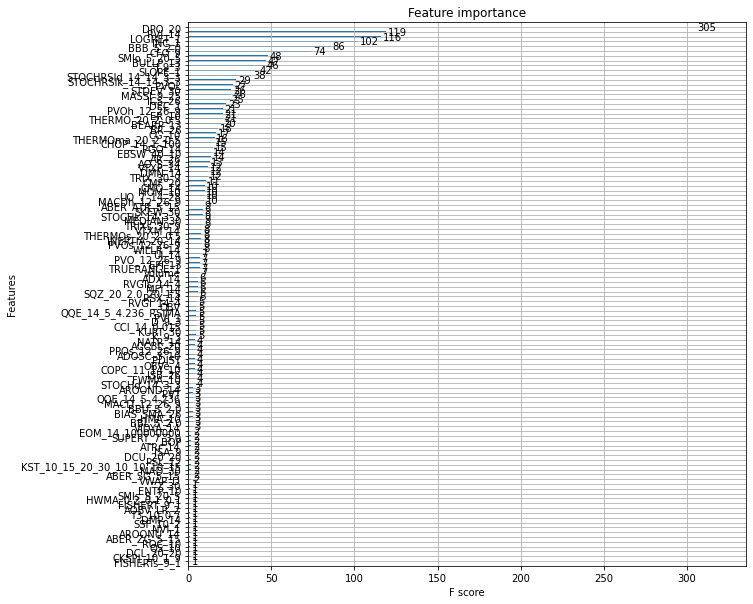

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(my_model, ax=ax)

# SMOTE

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(trainp,target)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(X_res,y_res, test_size = 0.3, random_state = 0)

In [ ]:
X_trainXG.shape, X_testXG.shape, y_trainXG.shape, y_testXG.shape

((48755, 185), (20895, 185), (48755,), (20895,))

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_trainXG, y_trainXG)
y_pred = my_model.predict(X_testXG)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98      7039
     class 1       0.98      0.95      0.96      6767
     class 2       0.98      0.99      0.98      7089

    accuracy                           0.98     20895
   macro avg       0.98      0.98      0.98     20895
weighted avg       0.98      0.98      0.98     20895



# Testing 

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
start = dt.datetime.today()-dt.timedelta(59)
end = dt.datetime.today()
fdf = yf.download('AXISBANK.NS',start=start, end=end,interval='15m')
fdf.ta.strategy(ta.AllStrategy)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
axis = stockBuySell(fdf)

Buy on day:  24 	 Sell on day:  31 	 Profit:  12.10003662109375
Buy on day:  72 	 Sell on day:  75 	 Profit:  11.550048828125
Buy on day:  199 	 Sell on day:  201 	 Profit:  8.70001220703125
Buy on day:  224 	 Sell on day:  225 	 Profit:  16.75
Buy on day:  297 	 Sell on day:  302 	 Profit:  11.75
Buy on day:  319 	 Sell on day:  325 	 Profit:  21.60003662109375
Buy on day:  339 	 Sell on day:  343 	 Profit:  7.949951171875
Buy on day:  405 	 Sell on day:  411 	 Profit:  8.550048828125
Buy on day:  450 	 Sell on day:  455 	 Profit:  8.4000244140625
Buy on day:  663 	 Sell on day:  666 	 Profit:  7.550048828125
Buy on day:  724 	 Sell on day:  728 	 Profit:  9.0
Buy on day:  749 	 Sell on day:  751 	 Profit:  7.04998779296875
Buy on day:  833 	 Sell on day:  842 	 Profit:  8.199951171875
Buy on day:  849 	 Sell on day:  851 	 Profit:  7.25
Buy on day:  898 	 Sell on day:  902 	 Profit:  7.699951171875
Buy on day:  924 	 Sell on day:  926 	 Profit:  8.3499755859375
Buy on day:  930 	 Sel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#  checking columns
train_cols = axis.columns
test_cols = trainp.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

In [ ]:
train_not_test

Index(['HILOl_13_21', 'HILOs_13_21', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2',
       'QQEl_14_5_4.236', 'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0',
       'adj_close', 'final_buy', 'high', 'low', 'open'],
      dtype='object')

In [ ]:
# axis['final_buy'] = axis['final_buy'].map(mapping)
axis = axis.drop(columns=['SUPERTs_7_3.0', 'QQEl_14_5_4.236', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2',
       'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'HILOl_13_21', 'HILOs_13_21','open', 'high', 'low','adj_close'])

In [ ]:
axis.isna().sum()

close            0
volume           0
AD               0
ADOSC_3_10       9
ABER_ZG_5_15     4
                ..
Z_30            29
VIDYA_14        14
VTXP_14         14
VTXM_14         14
final_buy        0
Length: 186, dtype: int64

In [ ]:
axis = axis.dropna()
# axis = axis.drop(corr_features,axis=1)

In [ ]:
ax = axis.drop(['final_buy'],axis=1)
ay = axis.final_buy

In [ ]:
X_trainXG.shape

(48755, 185)

In [ ]:
len(ax.columns)

185

In [ ]:
ax

,close,volume,AD,ADOSC_3_10,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AMATe_LR_2,AMATe_SR_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CDL_DOJI_10_0.1,AROOND_14,AROONU_14,AROONOSC_14,ATRr_14,...,SQZ_ON,SQZ_OFF,SQZ_NO,SSF_10_2,STDEV_30,STOCHk_14_3_3,STOCHd_14_3_3,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QS_10,SWMA_10,T3_10_0.7,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,SUPERT_7_3.0,SUPERTd_7_3.0,TEMA_10,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRIMA_10,TRIX_30_9,TRIXs_30_9,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,TRUERANGE_1,TSI_13_25,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,Z_30,VIDYA_14,VTXP_14,VTXM_14
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-07 09:45:00+05:30,722.650024,248959,1.419363e+06,140859.579960,720.473336,723.984775,716.961897,3.511439,708.812955,716.042502,723.087949,1,0,4.815587,3748223.0,3748223.0,3997182.0,3.814248e+06,3.381485e+06,1,0,1.877570,17.069464,27.957319,10.203975,715.180390,711.827582,720.730017,729.632452,2.470394,0.009738,-0.403845,110.539816,126.086346,143.010770,0,71.428571,85.714286,14.285714,3.514255,...,0,1,0,722.088838,3.172356,79.655509,78.767483,57.273948,62.847699,0.050000,717.023336,716.828961,8.140357e+01,78.181491,712.330493,1,723.136271,1.200012,2.056727,1,1,716.738890,0.011673,0.009914,1,0.242642,57.723484,9.728384,2.599976,20.354765,723.901558,717.877825,723.075012,-28.965180,719.475465,723.091259,2.177674,595.599769,1.088795,0.839323
2021-05-07 10:00:00+05:30,723.650024,249005,1.552174e+06,145350.160938,722.180005,725.556769,718.803240,3.376765,709.337923,716.562503,723.575411,1,0,6.277061,3997228.0,3748223.0,3997228.0,3.887440e+06,3.476215e+06,1,0,2.283979,19.190367,27.065442,9.878454,715.056930,715.038577,722.280017,729.521457,2.005161,0.010709,0.666667,111.981813,127.993666,111.212721,0,64.285714,78.571429,14.285714,3.369966,...,0,1,0,723.140590,3.468217,75.632521,78.231741,58.226662,63.811082,0.315002,718.240007,717.690279,7.230832e+01,77.889801,712.980895,1,724.071345,0.799988,1.937038,1,0,717.722227,0.012626,0.010307,1,0.237257,61.324625,11.627577,1.500000,22.332263,723.830429,718.685868,723.450012,-22.068629,720.529105,724.574677,2.224493,602.192487,1.098501,0.854389
2021-05-07 10:15:00+05:30,721.849976,184794,1.414559e+06,90186.908639,723.410006,726.718046,720.101965,3.308041,709.865363,717.077502,724.065360,1,0,7.263387,3812434.0,3812434.0,3997228.0,3.857438e+06,3.527941e+06,1,0,2.466989,20.571035,25.683344,11.438153,715.263365,720.778783,723.440015,726.101247,0.735716,0.007883,-0.744669,102.804353,119.060427,75.368962,0,57.142857,71.428571,14.285714,3.296919,...,0,1,0,723.246336,3.614433,71.494477,75.594169,58.226662,62.765522,0.179999,719.640009,718.578490,6.327647e+01,72.329457,712.980895,1,723.767858,0.950012,1.843035,1,1,718.901396,0.013605,0.010790,-1,0.270921,59.111769,12.628658,2.350037,22.260933,723.701273,719.325254,722.287491,-34.482759,721.109099,723.433813,1.601443,605.528690,1.077434,0.893804
2021-05-07 10:30:00+05:30,720.200012,326482,1.140317e+06,-27837.406355,722.723340,725.977309,719.469371,3.253969,710.444935,717.425003,724.394932,1,0,6.549712,3485952.0,3485952.0,3812434.0,3.708843e+06,3.521481e+06,0,1,2.602248,20.965750,24.263888,14.232348,716.192484,719.513820,722.400012,725.286205,0.799057,0.005231,-0.519995,109.424905,124.925065,39.701591,0,50.000000,64.285714,14.285714,3.239855,...,0,1,0,722.518510,3.643056,65.862265,70.996421,58.226662,60.639378,0.104999,720.846678,719.388626,5.211737e+01,62.567387,712.980895,1,722.711924,1.549988,1.815126,1,1,720.183343,0.014527,0.011358,-1,0.326065,53.440174,12.829461,2.500000,20.778742,723.307984,719.852267,720.725006,-45.861816,721.272736,722.218575,1.070075,608.725873,1.023463,0.924022
2021-05-07 10:45:00+05:30,721.250000,317153,1.428645e+06,18151.0998

In [ ]:
ax.values.shape

(947, 185)

In [ ]:
# Predicting the Test set results
y_pred = my_model.predict(ax.values)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_pred, ay, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.42      0.50        24
     class 1       0.93      0.99      0.96       865
     class 2       0.75      0.21      0.32        58

    accuracy                           0.93       947
   macro avg       0.77      0.54      0.59       947
weighted avg       0.92      0.93      0.91       947



## Time series

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

* Samples. One sequence is one sample. A batch is comprised of one or more samples.
* Time Steps. One time step is one point of observation in the sample.
* Features. One feature is one observation at a time step.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(trainp)
scale_data = scaler.fit_transform(trainp)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(scale_data,og_target, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_trainXG= label_encoder.fit_transform(y_trainXG)
X_trainXG = np.expand_dims(X_trainXG, axis=1)

In [ ]:
y_trainXG = to_categorical(y_trainXG)

In [ ]:
X_trainXG=np.asarray(X_trainXG).astype(np.float32)
y_trainXG=np.asarray(y_trainXG).astype(np.float32)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_testXG= label_encoder.fit_transform(y_testXG)
X_testXG = np.expand_dims(X_testXG, axis=1)
y_testXG = to_categorical(y_testXG)
X_testXG=np.asarray(X_testXG).astype(np.float32)
y_testXG=np.asarray(y_testXG).astype(np.float32)

In [ ]:
# model = Sequential()
# model.add(LSTM(100, input_shape=(24672, 185)))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(n_outputs, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# model = Sequential()
# model.add(LSTM(1024, input_shape=(None,185), return_sequences=True))
# model.add(LSTM(512, return_sequences=True,dropout=0.2))
# model.add(LSTM(256, return_sequences=True,dropout=0.2))
# model.add(LSTM(128, return_sequences=False))
# # model.add(LSTM(128,dropout=0.2))
# model.add(Dense(3, activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',f1_m])

In [ ]:
model.fit(X_trainXG,y_trainXG,epochs=100,validation_data=(X_testXG,y_testXG))

Epoch 1/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1985 - accuracy: 0.9510 - val_loss: 0.1556 - val_accuracy: 0.9554
Epoch 2/100
540/540 [==============================] - 6s 10ms/step - loss: 0.1618 - accuracy: 0.9520 - val_loss: 0.1515 - val_accuracy: 0.9572
Epoch 3/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1515 - accuracy: 0.9519 - val_loss: 0.1346 - val_accuracy: 0.9573
Epoch 4/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1383 - accuracy: 0.9516 - val_loss: 0.1383 - val_accuracy: 0.9565
Epoch 5/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1331 - accuracy: 0.9519 - val_loss: 0.1183 - val_accuracy: 0.9568
Epoch 6/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1245 - accuracy: 0.9520 - val_loss: 0.1261 - val_accuracy: 0.9554
Epoch 7/100
540/540 [==============================] - 6s 11ms/step - loss: 0.1175 - accuracy: 0.9525 - val_loss: 0.1223 - val_accuracy:

In [ ]:
model.evaluate(X_testXG,y_testXG)

232/232 [==============================] - 1s 4ms/step - loss: 0.2459 - accuracy: 0.9512


[0.24594049155712128, 0.9512293934822083]

In [ ]:
y_pred = np.round(model.predict(X_testXG))
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.36      0.27      0.31       149
     class 1       0.97      0.98      0.97      7087
     class 2       0.42      0.22      0.29       166

   micro avg       0.95      0.95      0.95      7402
   macro avg       0.58      0.49      0.52      7402
weighted avg       0.94      0.95      0.95      7402
 samples avg       0.95      0.95      0.95      7402



## Balance LSTM

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# scaler.fit(trainp)
# scale_data = scaler.fit_transform(trainp)

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(trainp,og_target)
# X_res,y_res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_res)
scale_data = scaler.fit_transform(X_res)
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(scale_data,y_res, test_size = 0.3, random_state = 0)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_trainXG= label_encoder.fit_transform(y_trainXG)
X_trainXG = np.expand_dims(X_trainXG, axis=1)
y_trainXG = to_categorical(y_trainXG)
X_trainXG=np.asarray(X_trainXG).astype(np.float32)
y_trainXG=np.asarray(y_trainXG).astype(np.float32)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_testXG= label_encoder.fit_transform(y_testXG)
X_testXG = np.expand_dims(X_testXG, axis=1)
y_testXG = to_categorical(y_testXG)
X_testXG=np.asarray(X_testXG).astype(np.float32)
y_testXG=np.asarray(y_testXG).astype(np.float32)

In [ ]:
ax = np.expand_dims(ax, axis=1)
ax=np.asarray(ax).astype(np.float32)

In [ ]:
ay= label_encoder.fit_transform(ay)
ay = to_categorical(ay)
ay=np.asarray(ay).astype(np.float32)

In [ ]:
balance_model = Sequential()
balance_model.add(LSTM(1024, input_shape=(None,185), return_sequences=True))
model.add(keras.layers.Dropout(0.3))
balance_model.add(LSTM(512, return_sequences=True))
model.add(keras.layers.Dropout(0.3))
balance_model.add(LSTM(512, return_sequences=True))
model.add(keras.layers.Dropout(0.3))
balance_model.add(LSTM(256, return_sequences=True))
model.add(keras.layers.Dropout(0.3))
balance_model.add(LSTM(128, return_sequences=False))
# balance_model.add(LSTM(128,dropout=0.2))
balance_model.add(Dense(3, activation='softmax'))
balance_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
balance_model.fit(X_trainXG,y_trainXG,epochs=30,validation_data=(X_testXG,y_testXG))

Epoch 1/30
1524/1524 [==============================] - 26s 13ms/step - loss: 0.3849 - accuracy: 0.8236 - val_loss: 0.1611 - val_accuracy: 0.9419
Epoch 2/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.1599 - accuracy: 0.9460 - val_loss: 0.1197 - val_accuracy: 0.9615
Epoch 3/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.1216 - accuracy: 0.9617 - val_loss: 0.1255 - val_accuracy: 0.9598
Epoch 4/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.1076 - accuracy: 0.9670 - val_loss: 0.1127 - val_accuracy: 0.9673
Epoch 5/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.0887 - accuracy: 0.9752 - val_loss: 0.0860 - val_accuracy: 0.9760
Epoch 6/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.0812 - accuracy: 0.9764 - val_loss: 0.0913 - val_accuracy: 0.9713
Epoch 7/30
1524/1524 [==============================] - 18s 12ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0841 -

KeyboardInterrupt: ignored

In [ ]:
y_pred = np.round(balance_model.predict(X_testXG))
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99      7019
     class 1       0.99      0.96      0.97      6767
     class 2       0.98      0.99      0.99      7109

   micro avg       0.98      0.98      0.98     20895
   macro avg       0.98      0.98      0.98     20895
weighted avg       0.98      0.98      0.98     20895
 samples avg       0.98      0.98      0.98     20895



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = np.round(balance_model.predict(ax))
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(ay, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         5
     class 1       0.57      1.00      0.73        12
     class 2       0.00      0.00      0.00         4

   micro avg       0.57      0.57      0.57        21
   macro avg       0.19      0.33      0.24        21
weighted avg       0.33      0.57      0.42        21
 samples avg       0.57      0.57      0.57        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## testing

In [ ]:
dt.datetime(2021,2,28)

datetime.datetime(2021, 2, 28, 0, 0)

In [ ]:
import yfinance as yf
start = dt.datetime(2021,2,28)-dt.timedelta(59)
end = dt.datetime.today()
fdf = yf.download('AXISBANK.NS',start=start, end=end,interval='1d')
fdf.ta.strategy(ta.AllStrategy)

[*********************100%***********************]  1 of 1 completed


In [ ]:
axis = stockBuySell(fdf)
# axis['final_buy'] = axis['final_buy'].map(mapping)
axis = axis.drop(columns=['SUPERTs_7_3.0', 'QQEl_14_5_4.236', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2',
       'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'HILOl_13_21', 'HILOs_13_21','open', 'high', 'low','adj_close'])

axis = axis.dropna()
# axis = axis.drop(corr_features,axis=1)
ax = axis.drop(['final_buy'],axis=1)
ay = axis.final_buy

Buy on day:  0 	 Sell on day:  3 	 Profit:  44.0
Buy on day:  4 	 Sell on day:  6 	 Profit:  18.45001220703125
Buy on day:  7 	 Sell on day:  9 	 Profit:  20.8499755859375
Buy on day:  12 	 Sell on day:  15 	 Profit:  18.8499755859375
Buy on day:  16 	 Sell on day:  17 	 Profit:  13.9000244140625
Buy on day:  18 	 Sell on day:  19 	 Profit:  38.60003662109375
Buy on day:  20 	 Sell on day:  24 	 Profit:  81.0
Buy on day:  25 	 Sell on day:  27 	 Profit:  22.9000244140625
Buy on day:  28 	 Sell on day:  31 	 Profit:  59.20001220703125
Buy on day:  37 	 Sell on day:  39 	 Profit:  54.70001220703125
Buy on day:  40 	 Sell on day:  43 	 Profit:  29.1500244140625
Buy on day:  45 	 Sell on day:  48 	 Profit:  30.0
Buy on day:  53 	 Sell on day:  54 	 Profit:  7.5
Buy on day:  55 	 Sell on day:  56 	 Profit:  14.3499755859375
Buy on day:  60 	 Sell on day:  62 	 Profit:  17.6500244140625
Buy on day:  64 	 Sell on day:  65 	 Profit:  10.3499755859375
Buy on day:  68 	 Sell on day:  71 	 Profit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ax = np.expand_dims(ax, axis=1)
ax=np.asarray(ax).astype(np.float32)

ay= label_encoder.fit_transform(ay)
ay = to_categorical(ay)
ay=np.asarray(ay).astype(np.float32)

In [ ]:
y_pred = np.round(balance_model.predict(ax))
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(ay, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         5
     class 1       0.57      1.00      0.73        12
     class 2       0.00      0.00      0.00         4

   micro avg       0.57      0.57      0.57        21
   macro avg       0.19      0.33      0.24        21
weighted avg       0.33      0.57      0.42        21
 samples avg       0.57      0.57      0.57        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# repeat experiment
repeats=1
scores = list()
for r in range(repeats):
	score = evaluate_model(lstm_trainp, lstm_target)
	# score = score * 100.0
	# print('>#%d: %.3f' % (r+1, score))
	# scores.append(score)

ValueError: ignored

In [ ]:
lstm_target.shape

(24672, 3)

In [ ]:
lstm_trainp.shape

(1, 24672, 185)

In [ ]:
trainp.drop(['QQEs_14_5_4.236', 'PSARs_0.02_0.2', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0',
       'PSARl_0.02_0.2', 'QQEl_14_5_4.236', 'HILOl_13_21', 'HILOs_13_21','open','volume'],inplace=True,axis=1)
# testp.drop(['QQEs_14_5_4.236', 'PSARs_0.02_0.2', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0',
    #    'PSARl_0.02_0.2', 'QQEl_14_5_4.236', 'HILOl_13_21', 'HILOs_13_21','open','volume'],inplace=True,axis=1)
trainp.dropna(inplace=True)
# testp.dropna(inplace=True)

In [ ]:
X = trainp.drop(['final_buy'],axis=1)
y = trainp.final_buy

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [ ]:
X_res.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(X_res,y_res, test_size = 0.2, random_state = 0)

In [ ]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_trainXG, y_trainXG)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting the Test set results
y_pred = my_model.predict(X_testXG)
from sklearn.metrics import accuracy_score
accuracy_score(y_testXG, y_pred)

0.9630161851459689

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_testXG, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.97      4394
     class 1       0.96      0.92      0.94      4336
     class 2       0.96      0.99      0.97      4492

    accuracy                           0.96     13222
   macro avg       0.96      0.96      0.96     13222
weighted avg       0.96      0.96      0.96     13222



In [ ]:
import yfinance as yf

In [ ]:
start = dt.datetime.today()-dt.timedelta(59)
end = dt.datetime.today()
fdf = yf.download('AXISBANK.NS',start=start, end=end,interval='15m')
fdf.ta.strategy(ta.AllStrategy)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
axis = stockBuySell(fdf)

Buy on day:  20 	 Sell on day:  23 	 Profit:  8.0999755859375
Buy on day:  24 	 Sell on day:  27 	 Profit:  16.60003662109375
Buy on day:  34 	 Sell on day:  39 	 Profit:  8.45001220703125
Buy on day:  40 	 Sell on day:  42 	 Profit:  5.9000244140625
Buy on day:  58 	 Sell on day:  60 	 Profit:  6.39996337890625
Buy on day:  61 	 Sell on day:  65 	 Profit:  7.95001220703125
Buy on day:  75 	 Sell on day:  78 	 Profit:  13.25
Buy on day:  81 	 Sell on day:  88 	 Profit:  5.20001220703125
Buy on day:  97 	 Sell on day:  103 	 Profit:  25.45001220703125
Buy on day:  105 	 Sell on day:  107 	 Profit:  5.75
Buy on day:  117 	 Sell on day:  120 	 Profit:  6.9000244140625
Buy on day:  123 	 Sell on day:  125 	 Profit:  6.75
Buy on day:  131 	 Sell on day:  134 	 Profit:  10.64996337890625
Buy on day:  147 	 Sell on day:  148 	 Profit:  5.54998779296875
Buy on day:  149 	 Sell on day:  151 	 Profit:  7.39996337890625
Buy on day:  161 	 Sell on day:  167 	 Profit:  9.64996337890625
Buy on day: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
axis.drop(['QQEs_14_5_4.236', 'PSARs_0.02_0.2', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0',
       'PSARl_0.02_0.2', 'QQEl_14_5_4.236', 'HILOl_13_21', 'HILOs_13_21','open','volume'],inplace=True,axis=1)
axis.dropna(inplace=True)

In [ ]:
ax = axis.drop(['final_buy'],axis=1)
ay = axis.final_buy

In [ ]:
ax.drop(['VTXM_14'],axis=1,inplace=True)

In [ ]:
ax.shape

(847, 186)

In [ ]:
X_res.shape

(66109, 186)

In [ ]:
res_col = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185']

In [ ]:
ax_col =  ax.columns

In [ ]:
ccc = zip(ax_col, res_col)
a_dictionary = dict(ccc)

In [ ]:
ax = ax[X.columns]

In [ ]:
ax.rename(columns = a_dictionary, inplace = True)

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_org,y_org=smk.fit_sample(ax,ay)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Predicting the Test set results
y_pred = my_model.predict(X_org)
from sklearn.metrics import accuracy_score
accuracy_score(y_org, y_pred)

0.3687374749498998

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_org, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.10      0.16       672
     class 1       0.36      0.97      0.53       646
     class 2       0.34      0.06      0.10       678

    accuracy                           0.37      1996
   macro avg       0.40      0.38      0.27      1996
weighted avg       0.40      0.37      0.26      1996



In [ ]:
my_model.predict(ax.iloc[0:])

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'sell', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'sell', 'no', 'no', 'sell', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'sell', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 

In [ ]:
ay[ay == 'buy']

datetime
2021-03-05 10:45:00+05:30    buy
2021-03-05 14:45:00+05:30    buy
2021-03-08 10:30:00+05:30    buy
2021-03-08 13:30:00+05:30    buy
2021-03-08 15:00:00+05:30    buy
                            ... 
2021-04-26 12:30:00+05:30    buy
2021-04-26 14:15:00+05:30    buy
2021-04-27 10:00:00+05:30    buy
2021-04-28 11:15:00+05:30    buy
2021-04-28 13:30:00+05:30    buy
Name: final_buy, Length: 67, dtype: object

In [ ]:
ay.shape

(847,)

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()